In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa soundfile

In [2]:
import os

# Adjust this if your folder name is different
base_path = '/content/drive/MyDrive/IRMASdataset'
os.makedirs(base_path, exist_ok=True)
os.chdir(base_path)

print("Current directory:", os.getcwd())

Current directory: /content/drive/MyDrive/IRMASdataset


In [ ]:
#dataset resample and preprocess (universe)

import os
import librosa
import soundfile as sf

# Input and output directories within Google Drive
input_dir = base_path
output_dir = os.path.join(base_path, 'ResampledDatasetFixed')

# Instruments to process
instruments = ['cla', 'flu', 'sax', 'tru']

# Target sample rate
target_sample_rate = 22050

# Make sure output directory exists
os.makedirs(output_dir, exist_ok=True)

for instrument in instruments:
    instrument_input_path = os.path.join(input_dir, instrument)
    instrument_output_path = os.path.join(output_dir, instrument)
    os.makedirs(instrument_output_path, exist_ok=True)

    for filename in os.listdir(instrument_input_path):
        if filename.lower().endswith('.wav'):
            file_path = os.path.join(instrument_input_path, filename)
            try:
                # Load original audio
                y, sr = librosa.load(file_path, sr=None)

                # Resample
                y_resampled = librosa.resample(y, orig_sr=sr, target_sr=target_sample_rate)

                # Normalize amplitude
                if max(abs(y_resampled)) != 0:
                    y_resampled = y_resampled / max(abs(y_resampled))

                # Save
                output_path = os.path.join(instrument_output_path, filename)
                sf.write(output_path, y_resampled, target_sample_rate)
                print(f"✅ Resampled and saved: {output_path}")
            except Exception as e:
                print(f"❌ Error processing {filename}: {e}")

✅ Resampled and saved: /content/drive/MyDrive/IRMASdataset/ResampledDatasetFixed/cla/004__[cla][nod][cla]0242__1.wav
✅ Resampled and saved: /content/drive/MyDrive/IRMASdataset/ResampledDatasetFixed/cla/004__[cla][nod][cla]0242__3.wav
✅ Resampled and saved: /content/drive/MyDrive/IRMASdataset/ResampledDatasetFixed/cla/012__[cla][nod][cla]0244__1.wav
✅ Resampled and saved: /content/drive/MyDrive/IRMASdataset/ResampledDatasetFixed/cla/004__[cla][nod][cla]0242__2.wav
✅ Resampled and saved: /content/drive/MyDrive/IRMASdataset/ResampledDatasetFixed/cla/021__[cla][nod][cla]0237__2.wav
✅ Resampled and saved: /content/drive/MyDrive/IRMASdataset/ResampledDatasetFixed/cla/017__[cla][nod][cla]0150__2.wav
✅ Resampled and saved: /content/drive/MyDrive/IRMASdataset/ResampledDatasetFixed/cla/030__[cla][nod][cla]0240__2.wav
✅ Resampled and saved: /content/drive/MyDrive/IRMASdataset/ResampledDatasetFixed/cla/012__[cla][nod][cla]0244__3.wav
✅ Resampled and saved: /content/drive/MyDrive/IRMASdataset/Resam

In [ ]:
#spectrograms (universe)

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def create_spectrogram(audio_file, image_file, cmap='magma'):
    try:
        y, sr = librosa.load(audio_file, sr=22050)
        ms = librosa.feature.melspectrogram(y=y, sr=sr)
        log_ms = librosa.power_to_db(ms, ref=np.max)

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(log_ms, sr=sr, x_axis='time', y_axis='mel', cmap=cmap)
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
        plt.tight_layout()
        plt.savefig(image_file)
        plt.close()
        print(f"📊 Saved: {image_file}")

    except Exception as e:
        print(f"❌ Error generating spectrogram for {audio_file}: {e}")

base_path = '/content/drive/MyDrive/IRMASdataset'

# Input and output folders
resampled_dir = os.path.join(base_path, 'ResampledDatasetFixed')
spectrogram_dir = os.path.join(base_path, 'MelSpectrograms')

# Instruments
instruments = ['cla', 'flu', 'sax', 'tru']

# Create output directory structure
os.makedirs(spectrogram_dir, exist_ok=True)

for instrument in instruments:
    instrument_input_dir = os.path.join(resampled_dir, instrument)
    instrument_output_dir = os.path.join(spectrogram_dir, instrument)
    os.makedirs(instrument_output_dir, exist_ok=True)

    for filename in os.listdir(instrument_input_dir):
        if filename.lower().endswith('.wav'):
            audio_file_path = os.path.join(instrument_input_dir, filename)
            image_file_name = os.path.splitext(filename)[0] + '.png'
            image_file_path = os.path.join(instrument_output_dir, image_file_name)

            create_spectrogram(audio_file_path, image_file_path)

📊 Saved: /content/drive/MyDrive/IRMASdataset/MelSpectrograms/cla/004__[cla][nod][cla]0242__1.png
📊 Saved: /content/drive/MyDrive/IRMASdataset/MelSpectrograms/cla/004__[cla][nod][cla]0242__3.png
📊 Saved: /content/drive/MyDrive/IRMASdataset/MelSpectrograms/cla/012__[cla][nod][cla]0244__1.png
📊 Saved: /content/drive/MyDrive/IRMASdataset/MelSpectrograms/cla/004__[cla][nod][cla]0242__2.png
📊 Saved: /content/drive/MyDrive/IRMASdataset/MelSpectrograms/cla/021__[cla][nod][cla]0237__2.png
📊 Saved: /content/drive/MyDrive/IRMASdataset/MelSpectrograms/cla/017__[cla][nod][cla]0150__2.png
📊 Saved: /content/drive/MyDrive/IRMASdataset/MelSpectrograms/cla/030__[cla][nod][cla]0240__2.png
📊 Saved: /content/drive/MyDrive/IRMASdataset/MelSpectrograms/cla/012__[cla][nod][cla]0244__3.png
📊 Saved: /content/drive/MyDrive/IRMASdataset/MelSpectrograms/cla/019__[cla][nod][cla]0223__2.png
📊 Saved: /content/drive/MyDrive/IRMASdataset/MelSpectrograms/cla/017__[cla][nod][cla]0150__1.png
📊 Saved: /content/drive/MyDriv

In [ ]:
#MFCC (universe)

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


def create_mfcc(audio_file, image_file, n_mfcc=13, cmap='viridis'):
    try:
        y, sr = librosa.load(audio_file, sr=22050)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap=cmap)
        plt.colorbar()
        plt.title('MFCC')
        plt.tight_layout()
        plt.savefig(image_file)
        plt.close()
        print(f"🎵 MFCC saved: {image_file}")

    except Exception as e:
        print(f"❌ Error generating MFCC for {audio_file}: {e}")

# Base path in Drive
base_path = '/content/drive/MyDrive/IRMASdataset'

# Input and output folders
resampled_dir = os.path.join(base_path, 'ResampledDatasetFixed')
mfcc_dir = os.path.join(base_path, 'MFCCs')

# Instruments
instruments = ['cla', 'flu', 'sax', 'tru']

# Make sure output dir exists
os.makedirs(mfcc_dir, exist_ok=True)

for instrument in instruments:
    instrument_input_dir = os.path.join(resampled_dir, instrument)
    instrument_output_dir = os.path.join(mfcc_dir, instrument)
    os.makedirs(instrument_output_dir, exist_ok=True)

    for filename in os.listdir(instrument_input_dir):
        if filename.lower().endswith('.wav'):
            audio_file_path = os.path.join(instrument_input_dir, filename)
            image_file_name = os.path.splitext(filename)[0] + '.png'
            image_file_path = os.path.join(instrument_output_dir, image_file_name)

            create_mfcc(audio_file_path, image_file_path)

🎵 MFCC saved: /content/drive/MyDrive/IRMASdataset/MFCCs/cla/004__[cla][nod][cla]0242__1.png
🎵 MFCC saved: /content/drive/MyDrive/IRMASdataset/MFCCs/cla/004__[cla][nod][cla]0242__3.png
🎵 MFCC saved: /content/drive/MyDrive/IRMASdataset/MFCCs/cla/012__[cla][nod][cla]0244__1.png
🎵 MFCC saved: /content/drive/MyDrive/IRMASdataset/MFCCs/cla/004__[cla][nod][cla]0242__2.png
🎵 MFCC saved: /content/drive/MyDrive/IRMASdataset/MFCCs/cla/021__[cla][nod][cla]0237__2.png
🎵 MFCC saved: /content/drive/MyDrive/IRMASdataset/MFCCs/cla/017__[cla][nod][cla]0150__2.png
🎵 MFCC saved: /content/drive/MyDrive/IRMASdataset/MFCCs/cla/030__[cla][nod][cla]0240__2.png
🎵 MFCC saved: /content/drive/MyDrive/IRMASdataset/MFCCs/cla/012__[cla][nod][cla]0244__3.png
🎵 MFCC saved: /content/drive/MyDrive/IRMASdataset/MFCCs/cla/019__[cla][nod][cla]0223__2.png
🎵 MFCC saved: /content/drive/MyDrive/IRMASdataset/MFCCs/cla/017__[cla][nod][cla]0150__1.png
🎵 MFCC saved: /content/drive/MyDrive/IRMASdataset/MFCCs/cla/021__[cla][nod][cla]

In [ ]:
#Chroma (Universe)

import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


def create_chroma(audio_file, image_file, cmap='coolwarm'):
    try:
        y, sr = librosa.load(audio_file, sr=22050)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)

        plt.figure(figsize=(10, 4))
        librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', sr=sr, cmap=cmap)
        plt.colorbar()
        plt.title('Chroma Feature')
        plt.tight_layout()
        plt.savefig(image_file)
        plt.close()
        print(f"🎼 Chroma saved: {image_file}")

    except Exception as e:
        print(f"❌ Error generating chroma for {audio_file}: {e}")

# Base path in Drive
base_path = '/content/drive/MyDrive/IRMASdataset'

# Input and output folders
resampled_dir = os.path.join(base_path, 'ResampledDatasetFixed')
chroma_dir = os.path.join(base_path, 'Chromas')

# Instruments
instruments = ['cla', 'flu', 'sax', 'tru']

# Ensure output base exists
os.makedirs(chroma_dir, exist_ok=True)

for instrument in instruments:
    instrument_input_dir = os.path.join(resampled_dir, instrument)
    instrument_output_dir = os.path.join(chroma_dir, instrument)
    os.makedirs(instrument_output_dir, exist_ok=True)

    for filename in os.listdir(instrument_input_dir):
        if filename.lower().endswith('.wav'):
            audio_file_path = os.path.join(instrument_input_dir, filename)
            image_file_name = os.path.splitext(filename)[0] + '.png'
            image_file_path = os.path.join(instrument_output_dir, image_file_name)

            create_chroma(audio_file_path, image_file_path)

🎼 Chroma saved: /content/drive/MyDrive/IRMASdataset/Chromas/cla/004__[cla][nod][cla]0242__1.png
🎼 Chroma saved: /content/drive/MyDrive/IRMASdataset/Chromas/cla/004__[cla][nod][cla]0242__3.png
🎼 Chroma saved: /content/drive/MyDrive/IRMASdataset/Chromas/cla/012__[cla][nod][cla]0244__1.png
🎼 Chroma saved: /content/drive/MyDrive/IRMASdataset/Chromas/cla/004__[cla][nod][cla]0242__2.png
🎼 Chroma saved: /content/drive/MyDrive/IRMASdataset/Chromas/cla/021__[cla][nod][cla]0237__2.png
🎼 Chroma saved: /content/drive/MyDrive/IRMASdataset/Chromas/cla/017__[cla][nod][cla]0150__2.png
🎼 Chroma saved: /content/drive/MyDrive/IRMASdataset/Chromas/cla/030__[cla][nod][cla]0240__2.png
🎼 Chroma saved: /content/drive/MyDrive/IRMASdataset/Chromas/cla/012__[cla][nod][cla]0244__3.png
🎼 Chroma saved: /content/drive/MyDrive/IRMASdataset/Chromas/cla/019__[cla][nod][cla]0223__2.png
🎼 Chroma saved: /content/drive/MyDrive/IRMASdataset/Chromas/cla/017__[cla][nod][cla]0150__1.png
🎼 Chroma saved: /content/drive/MyDrive/I

In [ ]:
# CODE CELL TO DETERMINE WHICH DATASET TO USE 100% OR 50%

DATASET_PORTION = "100"   # change to "50" when you want the half-dataset
SPLIT_SEED = 42           # keep this fixed for reproducibility
print(f"[Config] DATASET_PORTION={DATASET_PORTION}, SPLIT_SEED={SPLIT_SEED}")

[Config] DATASET_PORTION=100, SPLIT_SEED=42


In [ ]:
#concatinate (universe)

import os
from PIL import Image
import numpy as np

# Paths
base_path = '/content/drive/MyDrive/IRMASdataset'
mel_path = os.path.join(base_path, 'MelSpectrograms')
mfcc_path = os.path.join(base_path, 'MFCCs')
chroma_path = os.path.join(base_path, 'Chromas')

instruments = ['cla', 'sax', 'flu', 'tru']
labels_dict = {'cla': 0, 'sax': 1, 'flu': 2, 'tru': 3}

X_combined = []
y = []

def load_image(path):
    image = Image.open(path).convert('L')
    image = image.resize((128, 128))

    # Normalize contrast (stretch 0–255 to 0–1)
    min_val = np.min(image)
    max_val = np.max(image)
    if max_val > min_val:
        image = (image - min_val) / (max_val - min_val)
    else:
        image = image / 255.0  # fallback if flat
    return image

for instrument in instruments:
    mel_dir = os.path.join(mel_path, instrument)
    mfcc_dir = os.path.join(mfcc_path, instrument)
    chroma_dir = os.path.join(chroma_path, instrument)

    filenames = [f for f in os.listdir(mel_dir) if f.endswith('.png')]

    for file in filenames:
        try:
            mel = load_image(os.path.join(mel_dir, file))
            mfcc = load_image(os.path.join(mfcc_dir, file))
            chroma = load_image(os.path.join(chroma_dir, file))

            combined = np.stack((mel, mfcc, chroma), axis=-1)  # Shape: (128, 128, 3)
            X_combined.append(combined)
            y.append(labels_dict[instrument])
        except Exception as e:
            print(f"⚠️ Failed to process {file}: {e}")

X_combined = np.array(X_combined)
y = np.array(y)

KeyboardInterrupt: 

In [ ]:
# === Apply 50% stratified subset to X_combined / y (added) ===
import numpy as np
from collections import defaultdict

def stratified_half_indices(y_arr, seed=42):
    rng = np.random.RandomState(seed)
    classes = np.unique(y_arr)
    selected_indices = []
    for c in classes:
        idx = np.where(y_arr == c)[0]
        idx = np.sort(idx)  # deterministic order
        n_select = max(1, int(np.floor(len(idx) * 0.5)))
        chosen = rng.choice(idx, size=n_select, replace=False)
        selected_indices.extend(sorted(chosen))
    return np.array(sorted(selected_indices), dtype=int)

def print_class_counts(y_arr, label_dict):
    inv_map = {v: k for k, v in label_dict.items()}
    unique, counts = np.unique(y_arr, return_counts=True)
    print("Class distribution:")
    for u, c in zip(unique, counts):
        name = inv_map.get(u, str(u))
        print(f"  {name} ({u}): {c} samples")

print("🔎 Full dataset distribution:")
print_class_counts(y, labels_dict)

if DATASET_PORTION == "100":
    print("\n[Subset] Using stratified 50% of the dataset with seed =", SPLIT_SEED)
    idx_sel = stratified_half_indices(y, seed=SPLIT_SEED)

    # Save manifest for reproducibility
    import pandas as pd, os
    manifest_path = os.path.join(base_path, "subset_50_manifest.csv")
    pd.DataFrame({"index": idx_sel, "label": y[idx_sel]}).to_csv(manifest_path, index=False)
    print(f"[Subset] Saved manifest: {manifest_path}")

    # Apply subset
    X_combined = X_combined[idx_sel]

    y = y[idx_sel]

    print("\n🔎 Subset distribution:")
    print_class_counts(y, labels_dict)
    print("[Subset] Shapes now:", X_combined.shape, y.shape)
else:
    print("\n[Subset] Using 100% of the dataset (no reduction).")

🔎 Full dataset distribution:
Class distribution:
  cla (0): 505 samples
  sax (1): 626 samples
  flu (2): 451 samples
  tru (3): 577 samples

[Subset] Using stratified 50% of the dataset with seed = 42
[Subset] Saved manifest: /content/drive/MyDrive/IRMASdataset/subset_50_manifest.csv


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# === Apply 50% stratified subset to the already-loaded arrays ===
import numpy as np
import os
import pandas as pd

# Toggle here:
DATASET_PORTION = "50"   # "100" or "50"
SPLIT_SEED = 42

class_names = ['Clarinet', 'Saxophone', 'Flute', 'Trumpet']  # just for printouts

def print_class_counts(y_int, names):
    ids, cnts = np.unique(y_int, return_counts=True)
    for i, c in zip(ids, cnts):
        print(f"{names[i]}: {c} samples")

def stratified_half_indices(y_int, seed=42):
    rng = np.random.RandomState(seed)
    idx_sel = []
    for cls in np.unique(y_int):
        cls_idx = np.where(y_int == cls)[0]
        n = int(np.floor(len(cls_idx) * 0.5))
        chosen = rng.choice(cls_idx, size=n, replace=False)
        idx_sel.extend(chosen)
    return np.array(sorted(idx_sel), dtype=int)

print("🔍 Full dataset distribution:")
print_class_counts(y, class_names)

if DATASET_PORTION == "50":
    print(f"\n📉 Using stratified 50% of the dataset with seed = {SPLIT_SEED}")
    idx_sel = stratified_half_indices(y, seed=SPLIT_SEED)

    # Save manifest (for reproducibility)
    manifest_path = os.path.join(base_path, "subset_50_manifest.csv")
    pd.DataFrame({"index": idx_sel, "label": y[idx_sel]}).to_csv(manifest_path, index=False)
    print(f"📝 Saved subset manifest: {manifest_path}")

    # Apply subset to ALL arrays used later
    X_normalized = X_normalized[idx_sel]
    y            = y[idx_sel]
    y_cat        = y_cat[idx_sel]

    print("\n📊 Subset distribution:")
    print_class_counts(y, class_names)
    print("Shapes now -> X:", X_normalized.shape, " y:", y.shape, " y_cat:", y_cat.shape)
else:
    print("\n✅ Using 100% of the dataset (no reduction).")


🔍 Full dataset distribution:
Clarinet: 505 samples
Saxophone: 626 samples
Flute: 451 samples
Trumpet: 577 samples

📉 Using stratified 50% of the dataset with seed = 42
📝 Saved subset manifest: /content/drive/MyDrive/IRMASdataset/subset_50_manifest.csv

📊 Subset distribution:
Clarinet: 252 samples
Saxophone: 313 samples
Flute: 225 samples
Trumpet: 288 samples
Shapes now -> X: (1078, 128, 128, 3)  y: (1078,)  y_cat: (1078, 4)


In [ ]:
print("✅ Total concatenated images:", len(X_combined))
print("✅ Total labels:", len(y))

from collections import Counter

label_names = ['Clarinet', 'Saxophone', 'Flute', 'Trumpet']
label_counts = Counter(y)

for idx, count in label_counts.items():
    print(f"🎵 {label_names[idx]}: {count} samples")

✅ Total concatenated images: 1998
✅ Total labels: 1078
🎵 Clarinet: 252 samples
🎵 Saxophone: 313 samples
🎵 Flute: 225 samples
🎵 Trumpet: 288 samples


In [ ]:
#normalize and split (Universe)

from sklearn.model_selection import train_test_split  # keep import for holdout use
from tensorflow.keras.utils import to_categorical
import numpy as np

# X_combined and y must already exist from your pipeline
X_combined = np.array(X_combined)     # Convert list to NumPy array
X_combined = X_combined / 255.0       # Normalize to [0,1]

# One-hot labels for keras, keep integer y for stratification
NUM_CLASSES = 4
y_cat = to_categorical(y, num_classes=NUM_CLASSES)

print("X_combined shape:", X_combined.shape)
print("y (int) shape:", y.shape, "| y_cat (one-hot) shape:", y_cat.shape)


X_combined shape: (2159, 128, 128, 3)
y (int) shape: (2159,) | y_cat (one-hot) shape: (2159, 4)


In [ ]:
# CODE CELL TO DETERMINE WHETHER TO USE 80/20 SPLIT OR STRATIFIED K-FOLD

# === Evaluation split config (holdout vs stratified k-fold CV) ===
from sklearn.model_selection import train_test_split, StratifiedKFold
import numpy as np

# ----- Config -----
EVAL_MODE = "holdout"   # options: "holdout" or "cv"
TEST_SIZE = 0.2         # used only for holdout (e.g., 0.2 for 80/20)
KFOLDS = 5              # used only for CV
SEED = 42

def _print_class_counts(indices, y_int, title):
    vals, cnts = np.unique(y_int[indices], return_counts=True)
    print(title, dict(zip(vals.tolist(), cnts.tolist())))

# ---- HOLDOUT (single 80/20 split by default) ----
def _make_holdout():
    global X_train, X_test, y_train, y_test
    idx = np.arange(len(y))
    tr_idx, te_idx = train_test_split(idx, test_size=TEST_SIZE, stratify=y, random_state=SEED)
    # IMPORTANT: use the normalized cache
    X_train, X_test = X_normalized[tr_idx], X_normalized[te_idx]
    y_train, y_test = y_cat[tr_idx], y_cat[te_idx]
    _print_class_counts(tr_idx, y, "Train class counts:")
    _print_class_counts(te_idx, y, "Test  class counts:")
    print(f"[Holdout] Shapes -> X_train {X_train.shape}, X_test {X_test.shape}")

# ---- STRATIFIED K-FOLD CV ----
_skf = StratifiedKFold(n_splits=KFOLDS, shuffle=True, random_state=SEED)
_folds = list(_skf.split(np.zeros(len(y)), y))
_fold_ptr = 0

def get_next_fold():
    """
    Prepare the next CV fold -> sets X_train/X_test/y_train/y_test.
    Call this BEFORE your training cell. Repeat KFOLDS times.
    """
    global _fold_ptr, X_train, X_test, y_train, y_test
    if _fold_ptr >= len(_folds):
        raise StopIteration("All folds completed. Set _fold_ptr=0 to restart.")
    tr_idx, te_idx = _folds[_fold_ptr]
    _fold_ptr += 1
    # IMPORTANT: use the normalized cache
    X_train, X_test = X_normalized[tr_idx], X_normalized[te_idx]
    y_train, y_test = y_cat[tr_idx], y_cat[te_idx]
    print(f"[CV] Prepared fold {_fold_ptr}/{len(_folds)}")
    _print_class_counts(tr_idx, y, "Train class counts:")
    _print_class_counts(te_idx, y, "Test  class counts:")
    print(f"[CV] Shapes -> X_train {X_train.shape}, X_test {X_test.shape}")

# ---- Apply selection ----
if EVAL_MODE == "holdout":
    _make_holdout()
elif EVAL_MODE == "cv":
    print(f"[CV] Ready with {KFOLDS} folds. Run get_next_fold() before each training run.")
else:
    raise ValueError("EVAL_MODE must be 'holdout' or 'cv'.")


Train class counts: {0: 202, 1: 250, 2: 180, 3: 230}
Test  class counts: {0: 50, 1: 63, 2: 45, 3: 58}
[Holdout] Shapes -> X_train (862, 128, 128, 3), X_test (216, 128, 128, 3)


In [ ]:
np.save(os.path.join(base_path, 'X_combined.npy'), X_combined)
np.save(os.path.join(base_path, 'y.npy'), y)

In [3]:
import numpy as np

X_combined = np.load(os.path.join(base_path, 'X_combined.npy'))
y = np.load(os.path.join(base_path, 'y.npy'))

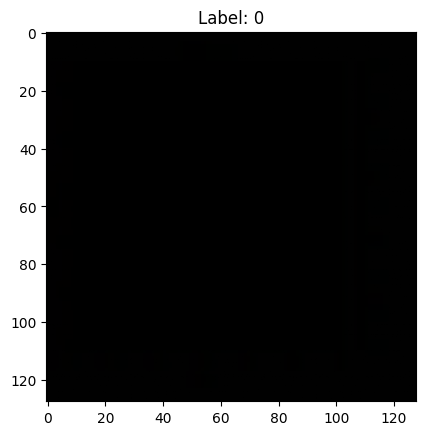

In [4]:
import matplotlib.pyplot as plt

# Visualize some stacked images
plt.imshow(X_combined[0])
plt.title(f"Label: {y[0]}")
plt.show()

In [ ]:
print("Min pixel value:", np.min(X_combined[0]))
print("Max pixel value:", np.max(X_combined[0]))

Min pixel value: 0.0
Max pixel value: 0.00392156862745098


In [6]:
def contrast_normalize(image):
    min_val = np.min(image)
    max_val = np.max(image)
    if max_val > min_val:
        return (image - min_val) / (max_val - min_val)
    return image

# Apply normalization to the entire dataset
X_normalized = np.array([contrast_normalize(img) for img in X_combined])

In [7]:
print("Min pixel:", np.min(X_normalized))
print("Max pixel:", np.max(X_normalized))

Min pixel: 0.0
Max pixel: 1.0


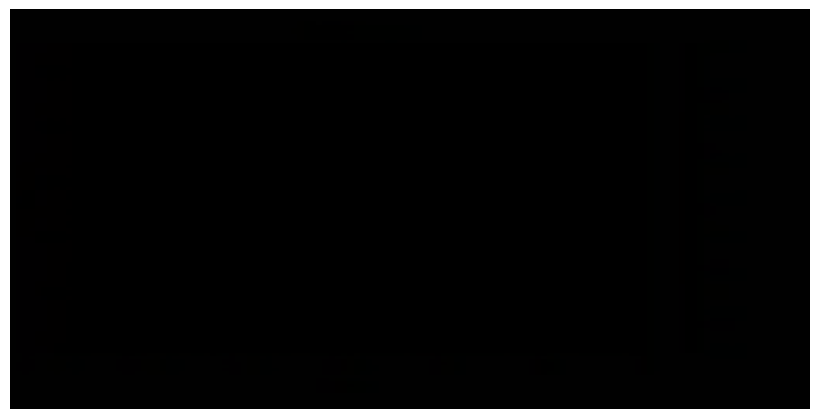

In [18]:
plt.figure(figsize=(8,4))
plt.imshow(X_combined[1500], aspect='auto', interpolation='none')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

After global normalization:
Min pixel: 0.0
Max pixel: 1.0


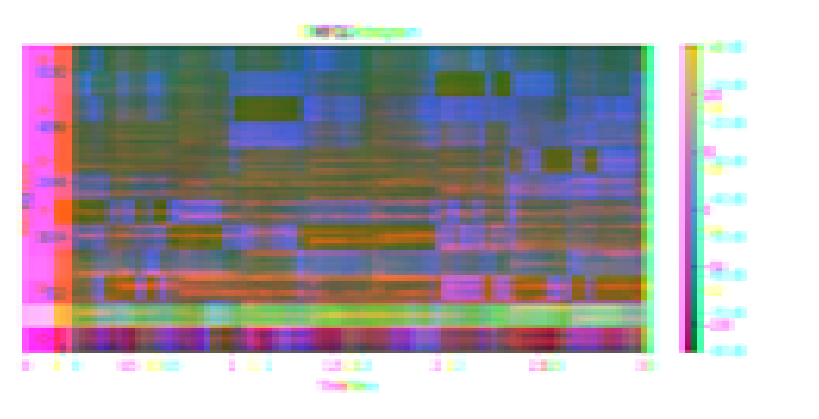

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Global normalization across the whole dataset
global_min = np.min(X_combined)
global_max = np.max(X_combined)

X_normalized = (X_combined - global_min) / (global_max - global_min)

print("After global normalization:")
print("Min pixel:", np.min(X_normalized))
print("Max pixel:", np.max(X_normalized))

# Step 2: Pick one concatenated sample
img = X_normalized[1500]

# Step 3: Plot clean, sharp, and consistent with other figures
plt.figure(figsize=(8, 4))
plt.imshow(img, aspect='auto', interpolation='none')
plt.axis('off')        # removes ticks, labels, frame
plt.tight_layout(pad=0)
plt.savefig("ConcatenatedImage.png", bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

In [ ]:
np.save(os.path.join(base_path, 'X_normalized.npy'), X_normalized)

In [ ]:
# Load cached arrays
import os, numpy as np

X_normalized = np.load(os.path.join(base_path, 'X_normalized.npy'))  # shape (N, 128, 128, 3)
y = np.load(os.path.join(base_path, 'y.npy'))                        # shape (N,)

print("X_normalized:", X_normalized.shape, X_normalized.dtype)
print("y:", y.shape, y.dtype)

X_normalized: (2159, 128, 128, 3) float64
y: (2159,) int64


In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

NUM_CLASSES = 4
y_cat = to_categorical(y, num_classes=NUM_CLASSES)

# (optional) quick class counts
vals, cnts = np.unique(y, return_counts=True)
print("Class counts:", dict(zip(vals.tolist(), cnts.tolist())))

Class counts: {0: 505, 1: 626, 2: 451, 3: 577}


In [ ]:

X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

print(X_train.shape, X_test.shape)   # -> (N, 128, 128, 3) (M, 128, 128, 3)

input_shape = X_train.shape[1:]      # -> (128, 128, 3)
print(input_shape)

(862, 128, 128, 3) (216, 128, 128, 3)
(128, 128, 3)


In [ ]:
import numpy as np

print("Unique label vectors:", np.unique(y, axis=0)[:10])   # if you stored one-hot/multi-hot
print("Sample labels:", y[:10])

Unique label vectors: [0 1 2 3]
Sample labels: [0 0 0 0 0 0 0 0 0 0]


In [ ]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("First 5 y_train rows:\n", y_train[:5])

y_train shape: (862, 4)
y_test shape: (216, 4)
First 5 y_train rows:
 [[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [ ]:
#AUGMENTATION FOR MODELS

import tensorflow as tf

augment = tf.keras.Sequential([
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.RandomTranslation(height_factor=0.02, width_factor=0.08, fill_mode='nearest'),
], name="augment")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
import tensorflow as tf

def build_cnn_model_1(input_shape, num_classes):
    model = Sequential([
        augment,

        Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Conv2D(64, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        GlobalAveragePooling2D(),
        Dropout(0.35),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax'),
    ])
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
        metrics=['accuracy']
    )
    return model



In [ ]:
# make sure augment exists (run the augment cell first), and X_train is ready
input_shape = X_train.shape[1:]   # (128,128,3)
num_classes = 4

model = build_cnn_model_1(input_shape, num_classes)  # <-- create the model instance
model.summary()                                      # optional


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augment (Sequential)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(X_train.dtype, X_train.min(), X_train.max())  # expect float32, ~0..1
for name, yy in [("train", y_train), ("test", y_test)]:
    import numpy as np
    print(name, dict(enumerate(np.sum(yy, axis=0).astype(int))))

float32 0.0 1.0
train {0: np.int64(202), 1: np.int64(250), 2: np.int64(180), 3: np.int64(230)}
test {0: np.int64(50), 1: np.int64(63), 2: np.int64(45), 3: np.int64(58)}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    #EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
]

history = model.fit(
    X_train, y_train,
    epochs=70,             # safe upper bound, early stopping will stop earlier
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=callbacks
)


Epoch 1/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3514 - loss: 1.3430 - val_accuracy: 0.2685 - val_loss: 1.3900 - learning_rate: 2.5000e-04
Epoch 2/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3706 - loss: 1.3247 - val_accuracy: 0.2639 - val_loss: 1.3830 - learning_rate: 2.5000e-04
Epoch 3/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.3491 - loss: 1.3230 - val_accuracy: 0.2685 - val_loss: 1.3901 - learning_rate: 2.5000e-04
Epoch 4/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.3911 - loss: 1.3133 - val_accuracy: 0.2685 - val_loss: 1.3976 - learning_rate: 2.5000e-04
Epoch 5/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.3917 - loss: 1.2806 - val_accuracy: 0.2685 - val_loss: 1.4240 - learning_rate: 2.5000e-04
Epoch 6/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4085 - loss: 1.2796 - val_accuracy: 0.2685 - val_loss: 1.4390 - learning_rate: 1.2500e-04
Epoch 7/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.3932 

In [ ]:
# ==== METRICS, FIGURES, SAVING (single-label, multi-class) ====
# Requires: model, X_test, y_test, base_path

import os, json, numpy as np, matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, f1_score, precision_score, recall_score,
    balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef,
    average_precision_score, precision_recall_fscore_support
)

# --- identify this run ---
exp_id = "CNN_M1_50_holdout"   # e.g. CNN_M1_50_holdout, CNN_M2_100_holdout, ...

# --- paths ---
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
out_dir = base_path
prefix = os.path.join(out_dir, f"{exp_id}_{ts}")

# --- predictions ---
y_true = y_test.argmax(axis=1)
y_prob = model.predict(X_test, verbose=0)
y_pred = y_prob.argmax(axis=1)

class_names = ['Clarinet','Saxophone','Flute','Trumpet']
clarinet_idx = 0

# --- overall metrics ---
acc     = accuracy_score(y_true, y_pred)
prec_m  = precision_score(y_true, y_pred, average='macro',   zero_division=0)
prec_w  = precision_score(y_true, y_pred, average='weighted',zero_division=0)
rec_m   = recall_score(y_true, y_pred, average='macro',      zero_division=0)
rec_w   = recall_score(y_true, y_pred, average='weighted',   zero_division=0)
f1_m    = f1_score(y_true, y_pred, average='macro')
f1_w    = f1_score(y_true, y_pred, average='weighted')
bacc    = balanced_accuracy_score(y_true, y_pred)
kappa   = cohen_kappa_score(y_true, y_pred)
mcc     = matthews_corrcoef(y_true, y_pred)
top2    = (np.argsort(y_prob, axis=1)[:, -2:] == y_true[:, None]).any(axis=1).mean()

# --- per-class report ---
report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True, digits=3)
report_text = classification_report(y_true, y_pred, target_names=class_names, digits=3)

# --- overall confusion matrix ---
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
plt.title(f"Confusion Matrix — {exp_id}")
plt.tight_layout()
cm_path = f"{prefix}_cm.png"
plt.savefig(cm_path, dpi=300)
plt.close()

# --- one-vs-rest confusion matrices (each instrument) ---
ovr_paths = {}
for i, name in enumerate(class_names):
    y_true_bin = (y_true == i).astype(int)
    y_pred_bin = (y_pred == i).astype(int)
    cm_i = confusion_matrix(y_true_bin, y_pred_bin, labels=[0,1])
    disp_i = ConfusionMatrixDisplay(confusion_matrix=cm_i, display_labels=["Not Present","Present"])
    fig, ax = plt.subplots(figsize=(4,4))
    disp_i.plot(ax=ax, cmap='Purples', values_format='d', colorbar=False)
    plt.title(f"{name} OvR Confusion Matrix — {exp_id}")
    plt.tight_layout()
    pth = f"{prefix}_cm_{name.replace(' ','_')}_ovr.png"
    plt.savefig(pth, dpi=300)
    plt.close()
    ovr_paths[name] = pth

# --- clarinet-focused metrics (binary + PR-AUC) ---
y_true_c = (y_true == clarinet_idx).astype(int)
y_pred_c = (y_pred == clarinet_idx).astype(int)
prec_c, rec_c, f1_c, _ = precision_recall_fscore_support(y_true_c, y_pred_c, average='binary', zero_division=0)
pr_auc_c = average_precision_score(y_true_c, y_prob[:, clarinet_idx])

# --- bundle + save metrics ---
metrics = {
    "exp_id": exp_id,
    "timestamp": ts,
    "overall": {
        "accuracy": float(acc),
        "precision_macro": float(prec_m),
        "recall_macro": float(rec_m),
        "f1_macro": float(f1_m),
        "precision_weighted": float(prec_w),
        "recall_weighted": float(rec_w),
        "f1_weighted": float(f1_w),
        "balanced_accuracy": float(bacc),
        "cohen_kappa": float(kappa),
        "mcc": float(mcc),
        "top2_accuracy": float(top2),
    },
    "per_class_report": report_dict,
    "clarinet_specific": {
        "precision": float(prec_c),
        "recall": float(rec_c),
        "f1": float(f1_c),
        "pr_auc": float(pr_auc_c),
        "support": int(y_true_c.sum()),
    },
    "artifacts": {
        "cm_overall_png": cm_path,
        "cm_ovr_pngs": ovr_paths,
    }
}

json_path = f"{prefix}_metrics.json"
txt_path  = f"{prefix}_metrics.txt"
with open(json_path, "w") as f: json.dump(metrics, f, indent=2)
with open(txt_path, "w") as f:
    f.write(
        f"Experiment: {exp_id}\n"
        f"Accuracy: {acc:.3f}\n"
        f"Macro  — Precision: {prec_m:.3f}  Recall: {rec_m:.3f}  F1: {f1_m:.3f}\n"
        f"Weighted — Precision: {prec_w:.3f}  Recall: {rec_w:.3f}  F1: {f1_w:.3f}\n"
        f"Balanced Acc: {bacc:.3f} | Cohen's κ: {kappa:.3f} | MCC: {mcc:.3f}\n"
        f"Top-2 Acc: {top2:.3f}\n\n"
        "Per-class precision/recall/F1/support:\n"
        f"{report_text}\n\n"
        f"Clarinet — Precision: {prec_c:.3f}, Recall: {rec_c:.3f}, F1: {f1_c:.3f}, PR-AUC: {pr_auc_c:.3f}\n"
        f"Overall CM: {cm_path}\n"
        f"OvR CMs: {ovr_paths}\n"
    )

# --- save predictions for reproducibility ---
np.save(f"{prefix}_y_true.npy", y_true)
np.save(f"{prefix}_y_pred.npy", y_pred)
np.save(f"{prefix}_y_prob.npy", y_prob)

# --- save the trained model ---
model_path = f"{prefix}_model.keras"   # Keras native format
model.save(model_path)

print("Saved:")
print("  Metrics JSON:", json_path)
print("  Metrics TXT :", txt_path)
print("  Overall CM  :", cm_path)
for name, path in ovr_paths.items():
    print(f"  OvR CM ({name}): {path}")
print("  y_true/y_pred/y_prob .npy files")
print("  Model:", model_path)


Saved:
  Metrics JSON: /content/drive/MyDrive/IRMASdataset/CNN_M1_50_holdout_20250818-183031_metrics.json
  Metrics TXT : /content/drive/MyDrive/IRMASdataset/CNN_M1_50_holdout_20250818-183031_metrics.txt
  Overall CM  : /content/drive/MyDrive/IRMASdataset/CNN_M1_50_holdout_20250818-183031_cm.png
  OvR CM (Clarinet): /content/drive/MyDrive/IRMASdataset/CNN_M1_50_holdout_20250818-183031_cm_Clarinet_ovr.png
  OvR CM (Saxophone): /content/drive/MyDrive/IRMASdataset/CNN_M1_50_holdout_20250818-183031_cm_Saxophone_ovr.png
  OvR CM (Flute): /content/drive/MyDrive/IRMASdataset/CNN_M1_50_holdout_20250818-183031_cm_Flute_ovr.png
  OvR CM (Trumpet): /content/drive/MyDrive/IRMASdataset/CNN_M1_50_holdout_20250818-183031_cm_Trumpet_ovr.png
  y_true/y_pred/y_prob .npy files
  Model: /content/drive/MyDrive/IRMASdataset/CNN_M1_50_holdout_20250818-183031_model.keras



📋 Classification Report:
              precision    recall  f1-score   support

    Clarinet      0.263     0.200     0.227        50
   Saxophone      0.304     0.222     0.257        63
       Flute      0.571     0.267     0.364        45
     Trumpet      0.432     0.828     0.568        58

    accuracy                          0.389       216
   macro avg      0.393     0.379     0.354       216
weighted avg      0.385     0.389     0.356       216



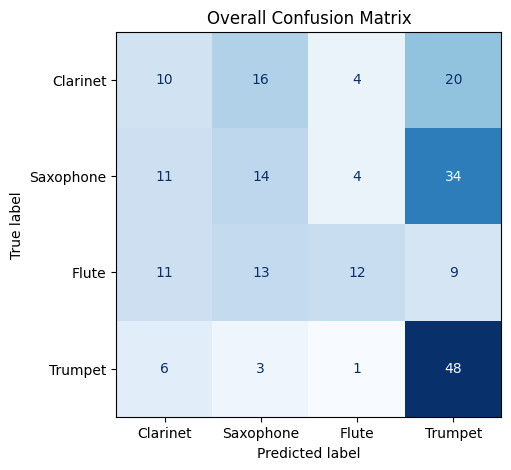

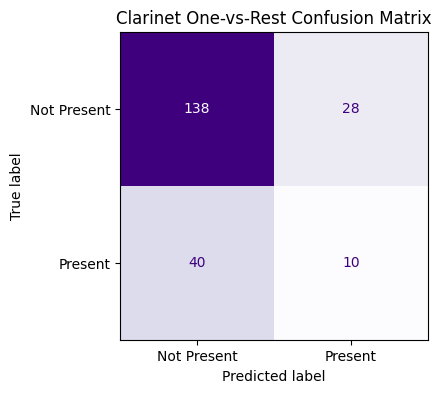

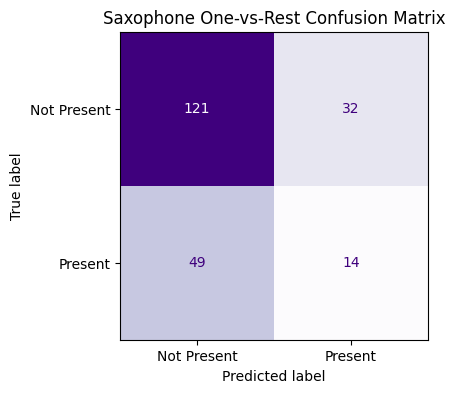

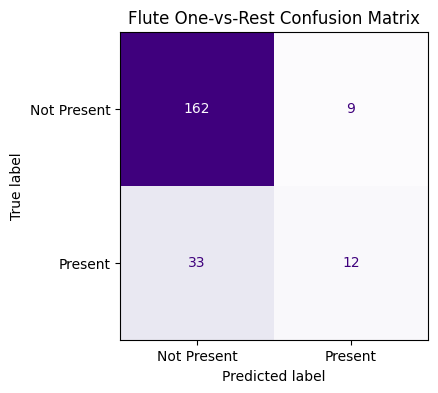

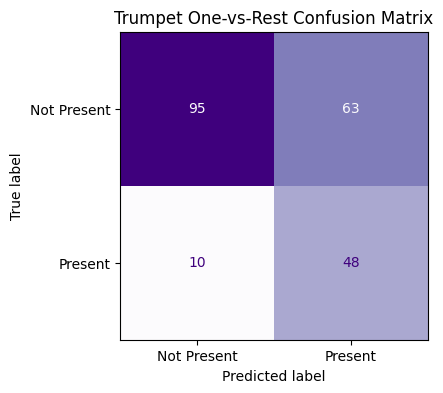


🎯 Clarinet-specific metrics:
Precision: 0.263
Recall:    0.200
F1-score:  0.227
PR-AUC:    0.300
Support (Clarinet samples): 50


In [ ]:
#VIEWEING THE METRICS

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, precision_recall_fscore_support, average_precision_score

# --- predictions (if not already loaded) ---
y_true = y_test.argmax(axis=1)
y_prob = model.predict(X_test, verbose=0)
y_pred = y_prob.argmax(axis=1)

class_names = ['Clarinet','Saxophone','Flute','Trumpet']
clarinet_idx = 0

# --- overall classification report ---
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=3))

# --- overall confusion matrix ---
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=False)
plt.title("Overall Confusion Matrix")
plt.show()

# --- one-vs-rest confusion matrices ---
for i, name in enumerate(class_names):
    y_true_bin = (y_true == i).astype(int)
    y_pred_bin = (y_pred == i).astype(int)
    cm_i = confusion_matrix(y_true_bin, y_pred_bin, labels=[0,1])
    disp_i = ConfusionMatrixDisplay(confusion_matrix=cm_i, display_labels=["Not Present","Present"])
    fig, ax = plt.subplots(figsize=(4,4))
    disp_i.plot(ax=ax, cmap="Purples", values_format="d", colorbar=False)
    plt.title(f"{name} One-vs-Rest Confusion Matrix")
    plt.show()

# --- clarinet-specific metrics ---
y_true_c = (y_true == clarinet_idx).astype(int)
y_pred_c = (y_pred == clarinet_idx).astype(int)
prec_c, rec_c, f1_c, _ = precision_recall_fscore_support(y_true_c, y_pred_c, average='binary', zero_division=0)
pr_auc_c = average_precision_score(y_true_c, y_prob[:, clarinet_idx])

print("\n🎯 Clarinet-specific metrics:")
print(f"Precision: {prec_c:.3f}")
print(f"Recall:    {rec_c:.3f}")
print(f"F1-score:  {f1_c:.3f}")
print(f"PR-AUC:    {pr_auc_c:.3f}")
print(f"Support (Clarinet samples): {y_true_c.sum()}")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, SeparableConv2D, MaxPooling2D,
                                     BatchNormalization, GlobalAveragePooling2D,
                                     Dense, Dropout, Input)
import tensorflow as tf

def build_cnn_model_2(input_shape, num_classes):
    model = Sequential([
        Input(shape=input_shape),   # <-- makes summary work properly
        augment,

        # Block 1: start with 64 filters, smaller kernel for locality
        Conv2D(64, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        # Block 2: separable conv for efficiency + more features
        SeparableConv2D(128, (3,3), padding='same', activation='relu'),
        BatchNormalization(),

        # Dilated conv before too much pooling
        SeparableConv2D(128, (3,3), padding='same', dilation_rate=2, activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        # Block 3: deeper conv for stronger representation
        Conv2D(256, (3,3), padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2,2)),

        GlobalAveragePooling2D(),
        Dropout(0.35),              # lighter dropout than 0.5
        Dense(160, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax'),
    ])

    # AdamW tuned a bit higher LR
    opt = tf.keras.optimizers.AdamW(learning_rate=7e-4, weight_decay=5e-5)

    model2.compile(
        optimizer=opt,
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
        metrics=['accuracy']
    )
    return model2


In [ ]:
# make sure augment exists (run the augment cell first), and X_train is ready
input_shape = X_train.shape[1:]   # (128,128,3)
num_classes = 4

model2 = build_cnn_model_2(input_shape, num_classes)  # <-- create the model instance
model2.summary()                                      # optional


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augment (Sequential)            │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 128, 128, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,708 (440.27 KB)

 Trainable params: 112,260 (438.52 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    #EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
]

history2 = model2.fit(
    X_train, y_train,
    epochs=70,             # safe upper bound, early stopping will stop earlier
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=callbacks
)

Epoch 1/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.5956 - loss: 1.0091 - val_accuracy: 0.4907 - val_loss: 1.1909 - learning_rate: 7.0000e-04
Epoch 2/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.6172 - loss: 0.9445 - val_accuracy: 0.3333 - val_loss: 1.7131 - learning_rate: 7.0000e-04
Epoch 3/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6188 - loss: 0.9894 - val_accuracy: 0.4444 - val_loss: 1.2502 - learning_rate: 7.0000e-04
Epoch 4/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6588 - loss: 0.9415 - val_accuracy: 0.3843 - val_loss: 1.4213 - learning_rate: 7.0000e-04
Epoch 5/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.6388 - loss: 0.9231 - val_accuracy: 0.3519 - val_loss: 2.0004 - learning_rate: 3.5000e-04
Epoch 6/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6476 - loss: 0.9128 - val_accuracy: 0.3657 - val_loss: 1.7409 - learning_rate: 3.5000e-04
Epoch 7/70
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6356 

In [ ]:
# ==== METRICS, FIGURES, SAVING (single-label, multi-class) ====
# Requires: model, X_test, y_test, base_path

import os, json, numpy as np, matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, f1_score, precision_score, recall_score,
    balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef,
    average_precision_score, precision_recall_fscore_support
)

# --- identify this run ---
exp_id = "CNN_M2_50_holdout"   # e.g. CNN_M1_50_holdout, CNN_M2_100_holdout, ...

# --- paths ---
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
out_dir = base_path
prefix = os.path.join(out_dir, f"{exp_id}_{ts}")

# --- predictions ---
y_true = y_test.argmax(axis=1)
y_prob = model2.predict(X_test, verbose=0)
y_pred = y_prob.argmax(axis=1)

class_names = ['Clarinet','Saxophone','Flute','Trumpet']
clarinet_idx = 0

# --- overall metrics ---
acc     = accuracy_score(y_true, y_pred)
prec_m  = precision_score(y_true, y_pred, average='macro',   zero_division=0)
prec_w  = precision_score(y_true, y_pred, average='weighted',zero_division=0)
rec_m   = recall_score(y_true, y_pred, average='macro',      zero_division=0)
rec_w   = recall_score(y_true, y_pred, average='weighted',   zero_division=0)
f1_m    = f1_score(y_true, y_pred, average='macro')
f1_w    = f1_score(y_true, y_pred, average='weighted')
bacc    = balanced_accuracy_score(y_true, y_pred)
kappa   = cohen_kappa_score(y_true, y_pred)
mcc     = matthews_corrcoef(y_true, y_pred)
top2    = (np.argsort(y_prob, axis=1)[:, -2:] == y_true[:, None]).any(axis=1).mean()

# --- per-class report ---
report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True, digits=3)
report_text = classification_report(y_true, y_pred, target_names=class_names, digits=3)

# --- overall confusion matrix ---
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
plt.title(f"Confusion Matrix — {exp_id}")
plt.tight_layout()
cm_path = f"{prefix}_cm.png"
plt.savefig(cm_path, dpi=300)
plt.close()

# --- one-vs-rest confusion matrices (each instrument) ---
ovr_paths = {}
for i, name in enumerate(class_names):
    y_true_bin = (y_true == i).astype(int)
    y_pred_bin = (y_pred == i).astype(int)
    cm_i = confusion_matrix(y_true_bin, y_pred_bin, labels=[0,1])
    disp_i = ConfusionMatrixDisplay(confusion_matrix=cm_i, display_labels=["Not Present","Present"])
    fig, ax = plt.subplots(figsize=(4,4))
    disp_i.plot(ax=ax, cmap='Purples', values_format='d', colorbar=False)
    plt.title(f"{name} OvR Confusion Matrix — {exp_id}")
    plt.tight_layout()
    pth = f"{prefix}_cm_{name.replace(' ','_')}_ovr.png"
    plt.savefig(pth, dpi=300)
    plt.close()
    ovr_paths[name] = pth

# --- clarinet-focused metrics (binary + PR-AUC) ---
y_true_c = (y_true == clarinet_idx).astype(int)
y_pred_c = (y_pred == clarinet_idx).astype(int)
prec_c, rec_c, f1_c, _ = precision_recall_fscore_support(y_true_c, y_pred_c, average='binary', zero_division=0)
pr_auc_c = average_precision_score(y_true_c, y_prob[:, clarinet_idx])

# --- bundle + save metrics ---
metrics = {
    "exp_id": exp_id,
    "timestamp": ts,
    "overall": {
        "accuracy": float(acc),
        "precision_macro": float(prec_m),
        "recall_macro": float(rec_m),
        "f1_macro": float(f1_m),
        "precision_weighted": float(prec_w),
        "recall_weighted": float(rec_w),
        "f1_weighted": float(f1_w),
        "balanced_accuracy": float(bacc),
        "cohen_kappa": float(kappa),
        "mcc": float(mcc),
        "top2_accuracy": float(top2),
    },
    "per_class_report": report_dict,
    "clarinet_specific": {
        "precision": float(prec_c),
        "recall": float(rec_c),
        "f1": float(f1_c),
        "pr_auc": float(pr_auc_c),
        "support": int(y_true_c.sum()),
    },
    "artifacts": {
        "cm_overall_png": cm_path,
        "cm_ovr_pngs": ovr_paths,
    }
}

json_path = f"{prefix}_metrics.json"
txt_path  = f"{prefix}_metrics.txt"
with open(json_path, "w") as f: json.dump(metrics, f, indent=2)
with open(txt_path, "w") as f:
    f.write(
        f"Experiment: {exp_id}\n"
        f"Accuracy: {acc:.3f}\n"
        f"Macro  — Precision: {prec_m:.3f}  Recall: {rec_m:.3f}  F1: {f1_m:.3f}\n"
        f"Weighted — Precision: {prec_w:.3f}  Recall: {rec_w:.3f}  F1: {f1_w:.3f}\n"
        f"Balanced Acc: {bacc:.3f} | Cohen's κ: {kappa:.3f} | MCC: {mcc:.3f}\n"
        f"Top-2 Acc: {top2:.3f}\n\n"
        "Per-class precision/recall/F1/support:\n"
        f"{report_text}\n\n"
        f"Clarinet — Precision: {prec_c:.3f}, Recall: {rec_c:.3f}, F1: {f1_c:.3f}, PR-AUC: {pr_auc_c:.3f}\n"
        f"Overall CM: {cm_path}\n"
        f"OvR CMs: {ovr_paths}\n"
    )

# --- save predictions for reproducibility ---
np.save(f"{prefix}_y_true.npy", y_true)
np.save(f"{prefix}_y_pred.npy", y_pred)
np.save(f"{prefix}_y_prob.npy", y_prob)

# --- save the trained model ---
model_path = f"{prefix}_model.keras"   # Keras native format
model.save(model_path)

print("Saved:")
print("  Metrics JSON:", json_path)
print("  Metrics TXT :", txt_path)
print("  Overall CM  :", cm_path)
for name, path in ovr_paths.items():
    print(f"  OvR CM ({name}): {path}")
print("  y_true/y_pred/y_prob .npy files")
print("  Model:", model_path)



Saved:
  Metrics JSON: /content/drive/MyDrive/IRMASdataset/CNN_M2_50_holdout_20250818-194007_metrics.json
  Metrics TXT : /content/drive/MyDrive/IRMASdataset/CNN_M2_50_holdout_20250818-194007_metrics.txt
  Overall CM  : /content/drive/MyDrive/IRMASdataset/CNN_M2_50_holdout_20250818-194007_cm.png
  OvR CM (Clarinet): /content/drive/MyDrive/IRMASdataset/CNN_M2_50_holdout_20250818-194007_cm_Clarinet_ovr.png
  OvR CM (Saxophone): /content/drive/MyDrive/IRMASdataset/CNN_M2_50_holdout_20250818-194007_cm_Saxophone_ovr.png
  OvR CM (Flute): /content/drive/MyDrive/IRMASdataset/CNN_M2_50_holdout_20250818-194007_cm_Flute_ovr.png
  OvR CM (Trumpet): /content/drive/MyDrive/IRMASdataset/CNN_M2_50_holdout_20250818-194007_cm_Trumpet_ovr.png
  y_true/y_pred/y_prob .npy files
  Model: /content/drive/MyDrive/IRMASdataset/CNN_M2_50_holdout_20250818-194007_model.keras



📋 Classification Report:
              precision    recall  f1-score   support

    Clarinet      0.545     0.480     0.511        50
   Saxophone      0.536     0.476     0.504        63
       Flute      0.619     0.578     0.598        45
     Trumpet      0.622     0.793     0.697        58

    accuracy                          0.583       216
   macro avg      0.580     0.582     0.577       216
weighted avg      0.578     0.583     0.577       216



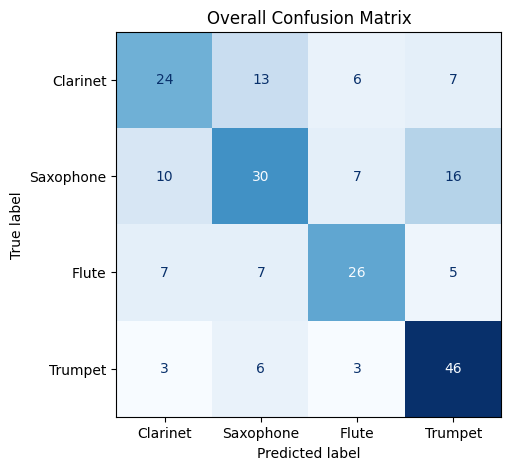

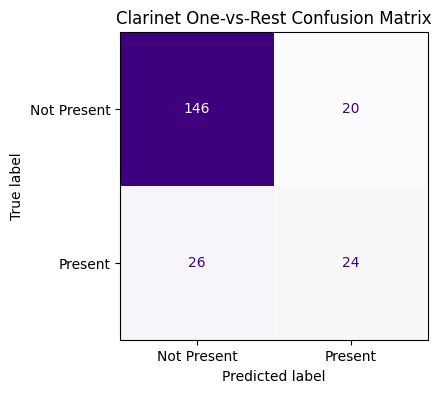

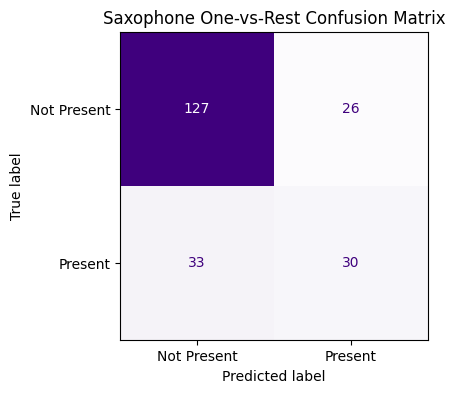

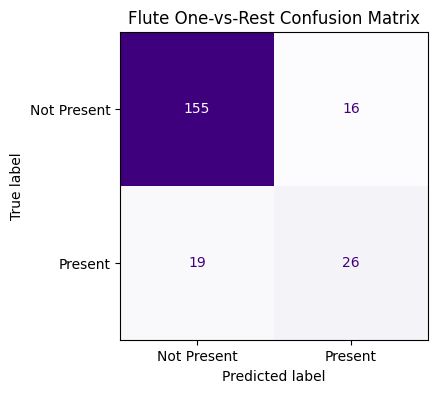

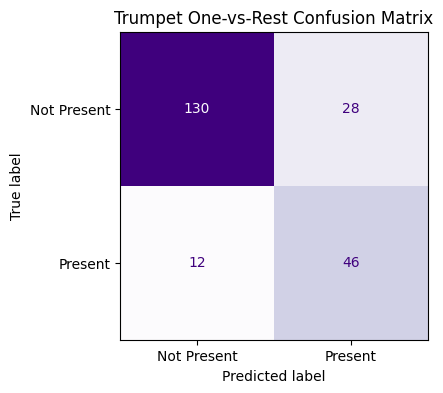


🎯 Clarinet-specific metrics:
Precision: 0.545
Recall:    0.480
F1-score:  0.511
PR-AUC:    0.531
Support (Clarinet samples): 50


In [ ]:
#VIEWEING THE METRICS

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, precision_recall_fscore_support, average_precision_score

# --- predictions (if not already loaded) ---
y_true = y_test.argmax(axis=1)
y_prob = model2.predict(X_test, verbose=0)
y_pred = y_prob.argmax(axis=1)

class_names = ['Clarinet','Saxophone','Flute','Trumpet']
clarinet_idx = 0

# --- overall classification report ---
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, digits=3))

# --- overall confusion matrix ---
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=False)
plt.title("Overall Confusion Matrix")
plt.show()

# --- one-vs-rest confusion matrices ---
for i, name in enumerate(class_names):
    y_true_bin = (y_true == i).astype(int)
    y_pred_bin = (y_pred == i).astype(int)
    cm_i = confusion_matrix(y_true_bin, y_pred_bin, labels=[0,1])
    disp_i = ConfusionMatrixDisplay(confusion_matrix=cm_i, display_labels=["Not Present","Present"])
    fig, ax = plt.subplots(figsize=(4,4))
    disp_i.plot(ax=ax, cmap="Purples", values_format="d", colorbar=False)
    plt.title(f"{name} One-vs-Rest Confusion Matrix")
    plt.show()

# --- clarinet-specific metrics ---
y_true_c = (y_true == clarinet_idx).astype(int)
y_pred_c = (y_pred == clarinet_idx).astype(int)
prec_c, rec_c, f1_c, _ = precision_recall_fscore_support(y_true_c, y_pred_c, average='binary', zero_division=0)
pr_auc_c = average_precision_score(y_true_c, y_prob[:, clarinet_idx])

print("\n🎯 Clarinet-specific metrics:")
print(f"Precision: {prec_c:.3f}")
print(f"Recall:    {rec_c:.3f}")
print(f"F1-score:  {f1_c:.3f}")
print(f"PR-AUC:    {pr_auc_c:.3f}")
print(f"Support (Clarinet samples): {y_true_c.sum()}")